In [149]:
import iResNet

import torch
import torch.nn as nn
import torch.utils.data as data
import torch.optim as optim
import torch.nn.functional as F

import importlib
importlib.reload(iResNet)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Real NVP

TODO: When s is too close to zero, it cannot inverse

When log_s is to large, s will be NaN

In [268]:
torch.tanh(torch.Tensor([3,4]))

tensor([0.9951, 0.9993])

In [446]:
importlib.reload(iResNet)

<module 'iResNet' from '/home/yanbo/Research/Lab/eLIFE/iResNetLab/src/iResNet.py'>

In [423]:
model = iResNet.Sequential(iResNet.RealNVP(4),
                           iResNet.RealNVP(4))

In [424]:
x = torch.Tensor([[1,2,3,-1],
                  [4,5,-6, 6]])

y, log_p, logdet = model(x)
y

tensor([[ 3.9741,  2.1388,  4.5146, -2.3358],
        [ 2.0442, 21.1376, -3.4644,  7.8975]], grad_fn=<AddBackward0>)

In [425]:
model.inverse(y)

tensor([[ 1.0000,  2.0000,  3.0000, -1.0000],
        [ 4.0000,  5.0000, -6.0000,  6.0000]], grad_fn=<AddBackward0>)

In [397]:
logdet

tensor([0.5745, 2.4006], grad_fn=<AddBackward0>)

# NN

In [97]:
model = nn.Sequential(nn.Linear(1, 8), nn.ELU(), nn.Linear(8,8), nn.ELU(), nn.Linear(8,1))

In [103]:
x = torch.linspace(-3, 3, 50).reshape(-1,1)
y = model(x)

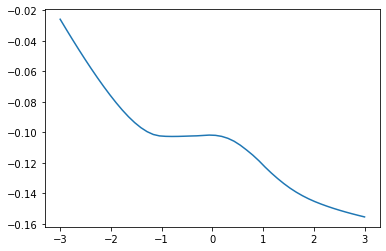

In [106]:
plt.plot(x.reshape(-1), y.reshape(-1).detach())

# Invertible Linear

In [447]:
fcn = iResNet.Linear(3)

In [448]:
y, p, logdet = fcn(torch.Tensor([[1,2,3], [-1,2,-3]]))
y

tensor([[ 1.3133, -1.4152,  1.1740],
        [ 0.1107, -0.9368, -1.0107]], grad_fn=<MmBackward>)

In [449]:
fcn.inverse(y)

tensor([[ 1.0000,  2.0000,  3.0000],
        [-1.0000,  2.0000, -3.0000]], grad_fn=<MmBackward>)

In [450]:
fcn.W()

tensor([[ 0.1852,  0.3560,  0.1387],
        [-0.3809, -0.5880,  0.0472],
        [ 0.3333,  0.0408,  0.2530]], grad_fn=<MmBackward>)

In [453]:
fcn.log_s

Parameter containing:
tensor([0., 0., 0.], requires_grad=True)

# FCN

In [107]:
model = iResNet.FCN(2, 2)
model

FCN(
  (net): SNFCN(
    (g): Sequential(
      (0): Linear(in_features=2, out_features=16, bias=True)
      (1): GELU()
      (2): Linear(in_features=16, out_features=16, bias=True)
      (3): GELU()
      (4): Linear(in_features=16, out_features=2, bias=True)
    )
  )
  (noise): NormalDistribution()
)

In [108]:
x = torch.Tensor([[1,2], [3,4]])
x.requires_grad = True
model.train()

y, p, logdet = model(x)
y

tensor([[1.0678, 2.0415],
        [3.1557, 4.0456]], grad_fn=<SliceBackward>)

In [109]:
model.inverse(y)

tensor([[1.0000, 2.0000],
        [3.0000, 4.0000]])

## Sequential

In [113]:
model = iResNet.Sequential(iResNet.FCN(8, 8),
                           iResNet.FCN(8, 8),
                           iResNet.FCN(8, 2))
print(model)

Sequential(
  (0): FCN(
    (net): SNFCN(
      (g): Sequential(
        (0): Linear(in_features=8, out_features=64, bias=True)
        (1): GELU()
        (2): Linear(in_features=64, out_features=64, bias=True)
        (3): GELU()
        (4): Linear(in_features=64, out_features=8, bias=True)
      )
    )
    (noise): NormalDistribution()
  )
  (1): FCN(
    (net): SNFCN(
      (g): Sequential(
        (0): Linear(in_features=8, out_features=64, bias=True)
        (1): GELU()
        (2): Linear(in_features=64, out_features=64, bias=True)
        (3): GELU()
        (4): Linear(in_features=64, out_features=8, bias=True)
      )
    )
    (noise): NormalDistribution()
  )
  (2): FCN(
    (net): SNFCN(
      (g): Sequential(
        (0): Linear(in_features=8, out_features=64, bias=True)
        (1): GELU()
        (2): Linear(in_features=64, out_features=64, bias=True)
        (3): GELU()
        (4): Linear(in_features=64, out_features=8, bias=True)
      )
    )
    (noise): NormalDi

In [117]:
x = torch.Tensor([[1,0,0,1,1,0,0,1]])
x.requires_grad = True

y, logp, log_det = model(x)
y

tensor([[0.9518, 0.1344]], grad_fn=<SliceBackward>)

In [120]:
model.inverse(y)

tensor([[ 0.9152,  0.0911,  1.7088,  1.6560,  0.9402,  0.2863,  1.4141, -0.5172]])

In [111]:
x = torch.Tensor([[1,2], [3,4], [-3,1]])
x.requires_grad = True
model.train()

y, p, logdet = model(x)
y

tensor([[ 1.1161,  2.0918],
        [ 3.0046,  4.1585],
        [-2.6586,  0.9173]], grad_fn=<SliceBackward>)

In [112]:
model.inverse(y)

tensor([[ 1.,  2.],
        [ 3.,  4.],
        [-3.,  1.]])

In [62]:
x = torch.Tensor([[1,2], [3,4], [-2, 1]])
x.requires_grad = True
model.eval()

y = model(x)
y

tensor([[ 0.8402,  2.0901],
        [ 2.7896,  4.0990],
        [-2.1957,  1.1529]], grad_fn=<SliceBackward>)

In [20]:
model.inverse(y.detach())

tensor([[ 1.0000,  2.0000],
        [ 3.0000,  4.0000],
        [-2.0000,  1.0000]])

# Conv1d

In [84]:
model = iResNet.Sequential(iResNet.Conv1d(channel=2, kernel_size=3),
                           iResNet.Conv1d(channel=2, kernel_size=1),
                           iResNet.Conv1d(channel=2, kernel_size=3))
model

Sequential(
  (0): Conv1d(
    (net): SNCov1d(
      (net): Sequential(
        (0): Conv1d(2, 16, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): GELU()
        (2): Conv1d(16, 16, kernel_size=(3,), stride=(1,), padding=(1,))
        (3): GELU()
        (4): Conv1d(16, 2, kernel_size=(3,), stride=(1,), padding=(1,))
      )
    )
  )
  (1): Conv1d(
    (net): SNCov1d(
      (net): Sequential(
        (0): Conv1d(2, 16, kernel_size=(1,), stride=(1,))
        (1): GELU()
        (2): Conv1d(16, 16, kernel_size=(1,), stride=(1,))
        (3): GELU()
        (4): Conv1d(16, 2, kernel_size=(1,), stride=(1,))
      )
    )
  )
  (2): Conv1d(
    (net): SNCov1d(
      (net): Sequential(
        (0): Conv1d(2, 16, kernel_size=(3,), stride=(1,), padding=(1,))
        (1): GELU()
        (2): Conv1d(16, 16, kernel_size=(3,), stride=(1,), padding=(1,))
        (3): GELU()
        (4): Conv1d(16, 2, kernel_size=(3,), stride=(1,), padding=(1,))
      )
    )
  )
)

In [85]:
x = torch.Tensor([[[1,2,3,4,5],[-1,-2,-3,-4,-5]], [[1,2,0,4,5],[-1,-2,0,-4,-5]]])
x.requires_grad = True

y, logp, logdet = model(x)
y

tensor([[[ 9.8334e-01,  2.0234e+00,  3.0385e+00,  4.2037e+00,  5.1804e+00],
         [-1.1709e+00, -2.1974e+00, -3.2554e+00, -4.2121e+00, -5.1788e+00]],

        [[ 1.0371e+00,  2.0080e+00, -2.1772e-03,  4.1299e+00,  5.2609e+00],
         [-1.1364e+00, -2.1973e+00, -2.2076e-01, -4.2422e+00, -5.1010e+00]]],
       grad_fn=<AddBackward0>)

In [86]:
model.inverse(y)

tensor([[[ 1.0000e+00,  2.0000e+00,  3.0000e+00,  4.0000e+00,  5.0000e+00],
         [-1.0000e+00, -2.0000e+00, -3.0000e+00, -4.0000e+00, -5.0000e+00]],

        [[ 1.0000e+00,  2.0000e+00,  1.4901e-08,  4.0000e+00,  5.0000e+00],
         [-1.0000e+00, -2.0000e+00, -4.4703e-08, -4.0000e+00, -5.0000e+00]]])

# Conv2d

In [121]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
model = iResNet.Sequential(iResNet.Conv2d(channel=3, kernel_size=3),
                           iResNet.Conv2d(channel=3, kernel_size=3),
                           iResNet.Conv2d(channel=3, kernel_size=3),
                           iResNet.Conv2d(channel=3, kernel_size=3),
                           iResNet.Conv2d(channel=3, kernel_size=3),
                           iResNet.Conv2d(channel=3, kernel_size=3)
                          )

In [125]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

for i in range(100):
    optimizer.zero_grad()
    x = torch.Tensor([[[[1,1,1],[0,1,0],[0,1,0]], [[0,1,0],[1,1,1],[0,1,0]], [[1,1,1],[0,1,0],[0,1,0]]]])
    x.requires_grad = True
    
    target = torch.Tensor([[[[0,0,0],[0,1,0],[0,0,0]], [[0,0,0],[0,1,0],[0,0,0]],[[0,0,0],[0,1,0],[0,0,0]]]])
    y, logp, logdet = model(x)
    loss = nn.MSELoss()(y, target)
    loss.backward()
    
    optimizer.step()

In [126]:
x = torch.Tensor([[[[1,1,1],[0,1,0],[0,1,0]], [[1,1,1],[0,1,0],[0,1,0]], [[1,1,1],[0,1,0],[0,1,0]]]])
x.requires_grad = True

y, logp, logdet = model(x)
y.shape

torch.Size([1, 3, 3, 3])

In [16]:
model.inverse(y)

tensor([[[[ 1.0000e+00,  1.0000e+00,  1.0000e+00],
          [ 0.0000e+00,  1.0000e+00,  5.5879e-09],
          [ 3.7253e-09,  1.0000e+00, -3.7253e-09]],

         [[ 1.0000e+00,  1.0000e+00,  1.0000e+00],
          [-6.9849e-09,  1.0000e+00, -6.9849e-09],
          [-1.8626e-09,  1.0000e+00,  9.3132e-09]],

         [[ 1.0000e+00,  1.0000e+00,  1.0000e+00],
          [ 0.0000e+00,  1.0000e+00,  9.7789e-09],
          [-1.8626e-09,  1.0000e+00, -6.9849e-09]]]])

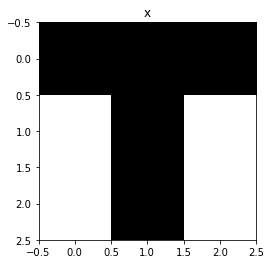

In [133]:
plt.imshow(1-x[0,0].detach(), cmap='gray')
plt.title('x')
#plt.savefig('cov2d_x.png')
plt.show()

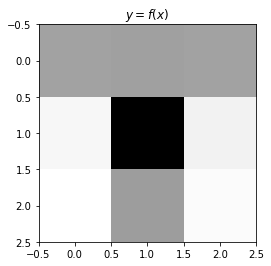

In [135]:
plt.imshow(1-y[0,0].detach(), cmap='gray')
plt.title('$y=f(x)$')
#plt.savefig('cov2d_y.png')
plt.show()

In [136]:
xhat = model.inverse(y)
xhat

tensor([[[[ 1.0000e+00,  1.0000e+00,  1.0000e+00],
          [-3.3528e-08,  1.0000e+00,  7.4506e-09],
          [ 2.6077e-08,  1.0000e+00,  7.4506e-09]],

         [[ 1.0000e+00,  1.0000e+00,  1.0000e+00],
          [ 0.0000e+00,  1.0000e+00, -8.9407e-08],
          [ 4.8429e-08,  1.0000e+00,  2.9802e-08]],

         [[ 1.0000e+00,  1.0000e+00,  1.0000e+00],
          [-1.4901e-08,  1.0000e+00,  7.4506e-09],
          [ 2.2352e-08,  1.0000e+00,  7.4506e-09]]]])

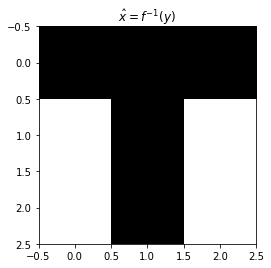

In [137]:
plt.imshow(1-xhat[0,0].detach(), cmap='gray')
plt.title('$\hat x = f^{-1}(y)$')
#plt.savefig('cov2d_x_hat.png')
plt.show()

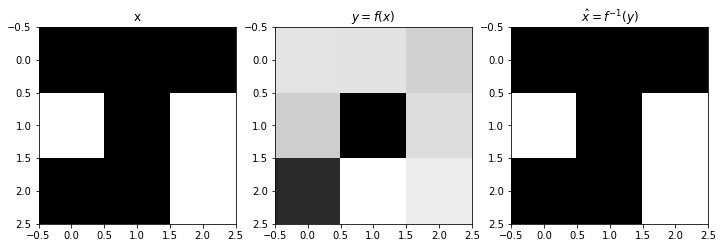

In [107]:
fig = plt.figure(figsize=(12,4))

fig = plt.subplot(131)
plt.imshow(1-x[0, 0].detach(), cmap='gray')
plt.title('x')

fig = plt.subplot(132)
plt.imshow(1-y[0, 0].detach(), cmap='gray')
plt.title('$y=f(x)$')

fig = plt.subplot(133)
plt.imshow(1-xhat[0, 0].detach(), cmap='gray')
plt.title('$\hat x = f^{-1}(y)$')

#plt.savefig('../images/cov2d.png')
plt.show()

In [21]:
help(iResNet.PixelShuffle2d(r=3))

Help on PixelShuffle2d in module iResNet object:

class PixelShuffle2d(iResNetAbstract.PixelShuffleModule)
 |  PixelShuffle2d(r)
 |  
 |  2d invertible pixel shuffle, using the built-in method
 |  from pytorch. (nn.PixelShuffle, and nn.PixelUnshuffle)
 |  
 |  Method resolution order:
 |      PixelShuffle2d
 |      iResNetAbstract.PixelShuffleModule
 |      torch.nn.modules.module.Module
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  PixelShuffle(self, x)
 |  
 |  PixelUnshuffle(self, x)
 |  
 |  __init__(self, r)
 |      Initializes internal Module state, shared by both nn.Module and ScriptModule.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from iResNetAbstract.PixelShuffleModule:
 |  
 |  forward(self, x, log_p0, log_det_J)
 |      Defines the computation performed at every call.
 |      
 |      Should be overridden by all subclasses.
 |      
 |      .. note::
 |          Although the recipe for forward pass

In [ ]:
torch.